In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


%config InlineBackend.figure_format = 'retina'

In [12]:
# Files
model_name = 'Model4'
filepath = '/Users/anirbandutta/Documents/SNEXP/Sedona_Models_Proj/Model6/'

model1 = filepath + 'spectrum_final_model_6.dat'
model1_lc = filepath + 'lc_model_5.out'


In [5]:
columns = ['Time', 'Freq', 'L_nu', 'packet_count']

sedona_model1_df = pd.read_csv(model1, sep='\s+', engine='python',
                           comment='#', names=columns)

In [6]:
sedona_model1_df['Wavelength'] = sedona_model1_df['Freq'].apply(lambda x: 3e18/x) # in angstrom
sedona_model1_df['L_lambda'] = sedona_model1_df.apply(lambda x: (x['L_nu'] * x['Freq'])/ x['Wavelength'], axis=1)
sedona_model1_df = sedona_model1_df[(sedona_model1_df['Wavelength']>3000) & (sedona_model1_df['Wavelength'] < 9500)]

(3500.0, 9000.0)

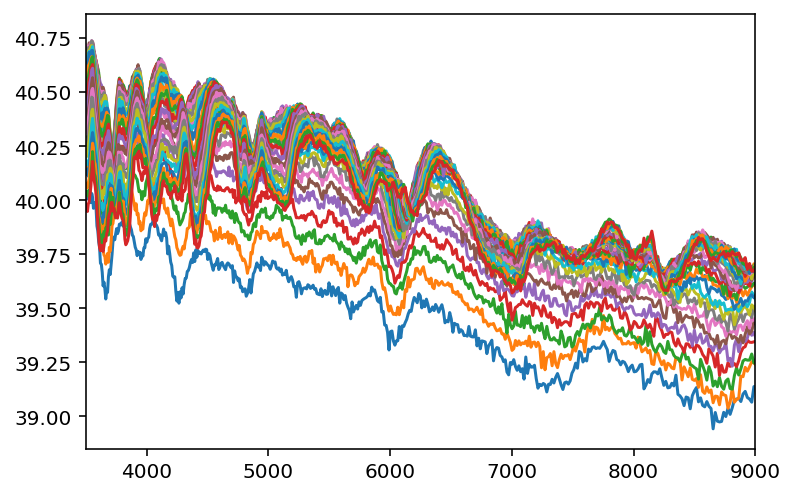

In [7]:
offset = [1.0, 2.0]
i = 0
for time, time_df in sedona_model1_df.groupby('Time'):
    day = time / 86400.
    if day < 10.5:
        day = str(0) + str(day)
    if 518400 < time < 3456000:
        plt.plot(time_df['Wavelength'], np.log10(time_df['L_lambda']) + offset[i])
        time_df.to_csv(filepath + model_name + '_' +  'Sedona_' + '106_' + str(day) + '.csv', sep=' ', index=None)
   # i = i + 1

plt.xlim(3500, 9000)  
#plt.ylim(0, 1.4e40)

In [8]:
def group_similar_files(text_list, common_text, exceptions=''):
    """
    Groups similar files based on the string 'common_text'. Writes the similar files
    onto the list 'text_list' (only if this string is not empty) and appends the similar
    files to a list 'python_list'.
    Args:
        text_list   : Name of the output text file with names grouped based on the 'common_text'
        common_text : String containing partial name of the files to be grouped
        exceptions  : String containing the partial name of the files that need to be excluded
    Returns:
        list_files  : Python list containing the names of the grouped files
    """
    list_files = glob.glob(common_text)
    if exceptions != '':
        list_exception = exceptions.split(',')
        for file_name in glob.glob(common_text):
            for text in list_exception:
                test = re.search(text, file_name)
                if test:
                    try:
                        list_files.remove(file_name)
                    except ValueError:
                        pass

    list_files.sort()
    if len(text_list) != 0:
        with open(text_list, 'w') as f:
            for file_name in list_files:
                f.write(file_name + '\n')

    return list_files

# ======================================================================================== #

def plot_sedona_spectrum(filename, ax, scale=1.0, color='red', alpha=0.7, label='__nolegend__'):
    
    df = pd.read_csv(filename, sep='\s+', engine='python')
    ax.plot(df['Wavelength'], df['L_lambda'] * scale, color=color, ls='-', alpha=alpha, lw=2.0,
           label=label)
    ax.legend(fontsize=25)
    
def plot_params(band, ax, ml_x, mil_x, ml_y, mil_y, invert=False):
    
    '''
    Remarks: Plotting parameters
    ax: axis object
    ml_x: major locator 'x'
    mil_x: minor locator 'x'
    ml_y: major locator 'y'
    mil_y: minor locator 'y'
    invert: Bool for the y-axis to be inverted 
    
    '''
    
    if invert:
        ax.invert_yaxis()
        
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 12, width = 2.0, labelsize = 12)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 6, width = 1.2, labelsize = 12)
    ax.xaxis.set_major_locator(MultipleLocator(ml_x))
    ax.xaxis.set_minor_locator(MultipleLocator(mil_x))
    ax.yaxis.set_major_locator(MultipleLocator(ml_y))
    ax.yaxis.set_minor_locator(MultipleLocator(mil_y))    
    
# ======================================================================================== #
    

In [9]:
list_model1_spectra = sorted(glob.glob(filepath + 'Model4_Sedona_106*'))

#print (list_model1_spectra)

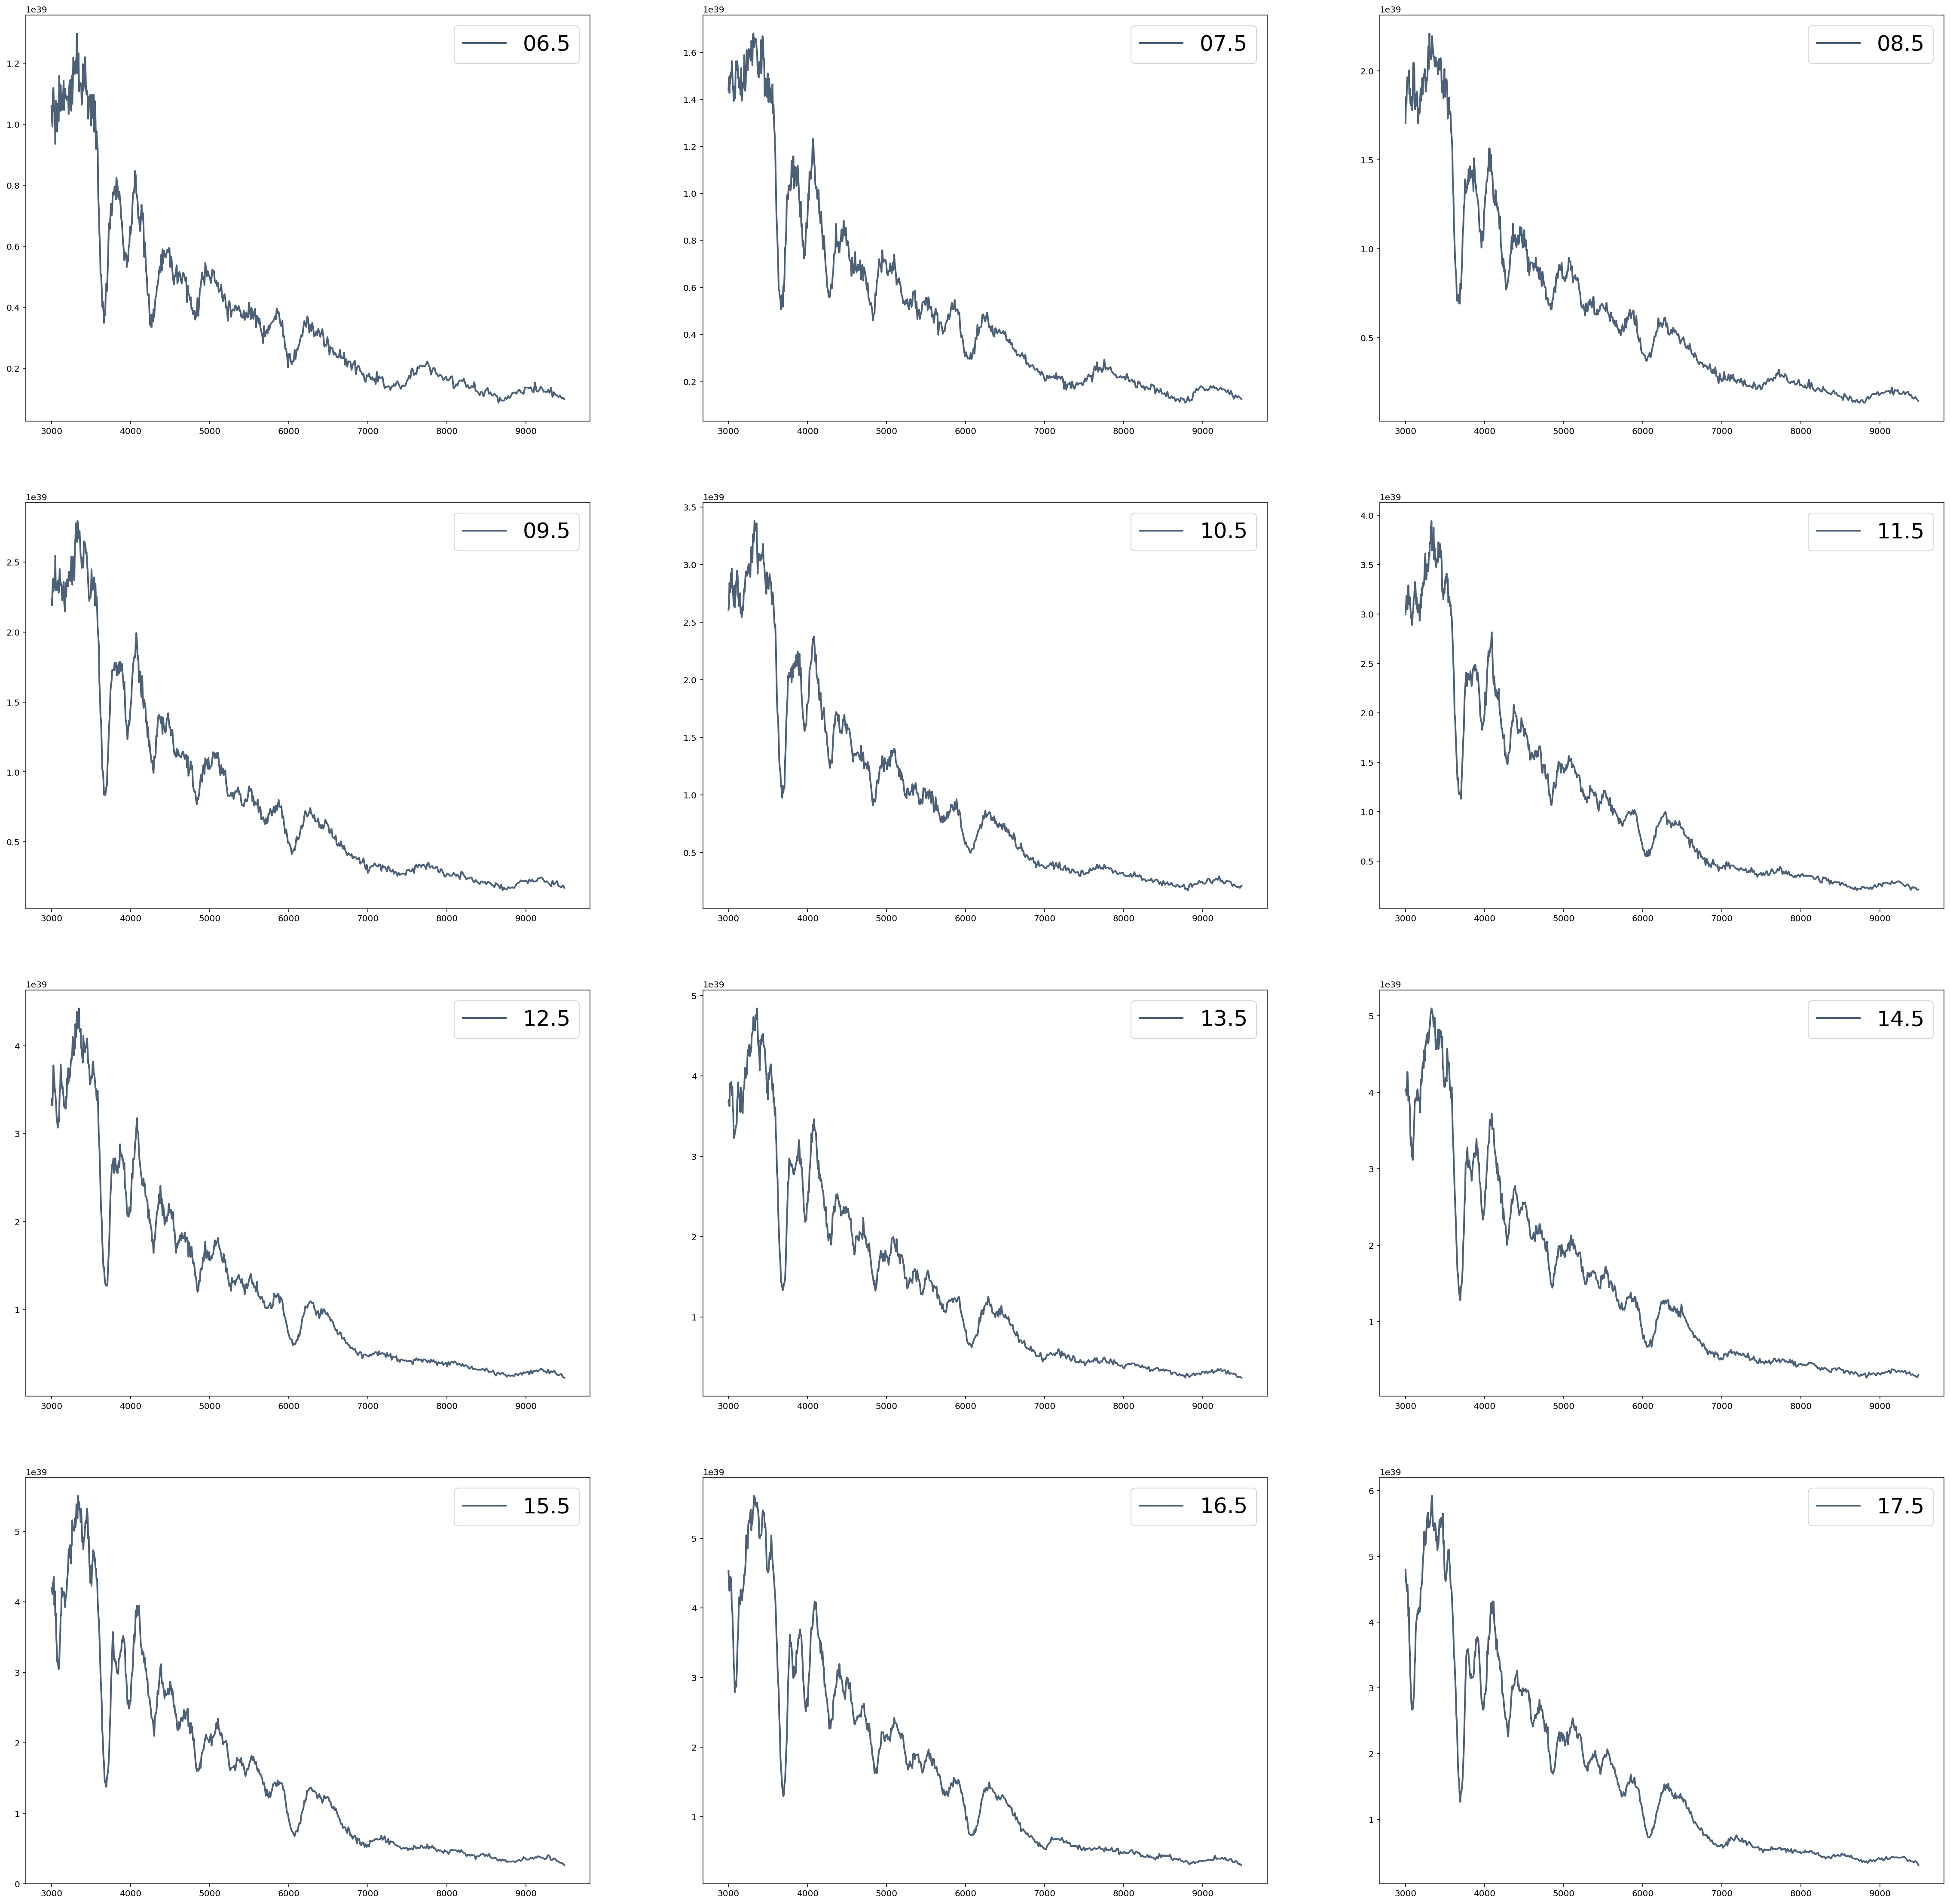

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(40, 40))
#fig.delaxes(axs[3, 2])
#fig.delaxes(axs[3, 1])

#plot_spectrum(list_text_spectra[0], axs[0, 0], 1000, 200, 0.5e39, 0.1e39, phase='9.6')
plot_sedona_spectrum(list_model1_spectra[0], axs[0, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[0].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[0], axs[0, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[1], axs[0, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[1].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[1], axs[0, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[2], axs[0, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[2].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[2], axs[0, 2], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[3], axs[1, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[3].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[3], axs[1, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[4], axs[1, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[4].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[4], axs[1, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[5], axs[1, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[5].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[5], axs[1, 2], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[6], axs[2, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[6].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[6], axs[2, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[7], axs[2, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[7].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[7], axs[2, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[8], axs[2, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[8].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[8], axs[2, 2], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[9], axs[3, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[9].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[9], axs[3, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[10], axs[3, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[10].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[10], axs[3, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[11], axs[3, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[11].split('/')[-1].split('_')[-1][0:4])
#plot_sedona_spectrum(list_model2_spectra[11], axs[3, 2], color='#ee9b00', alpha=1.0)

Text(7000, 1.5e+39, '39.5')

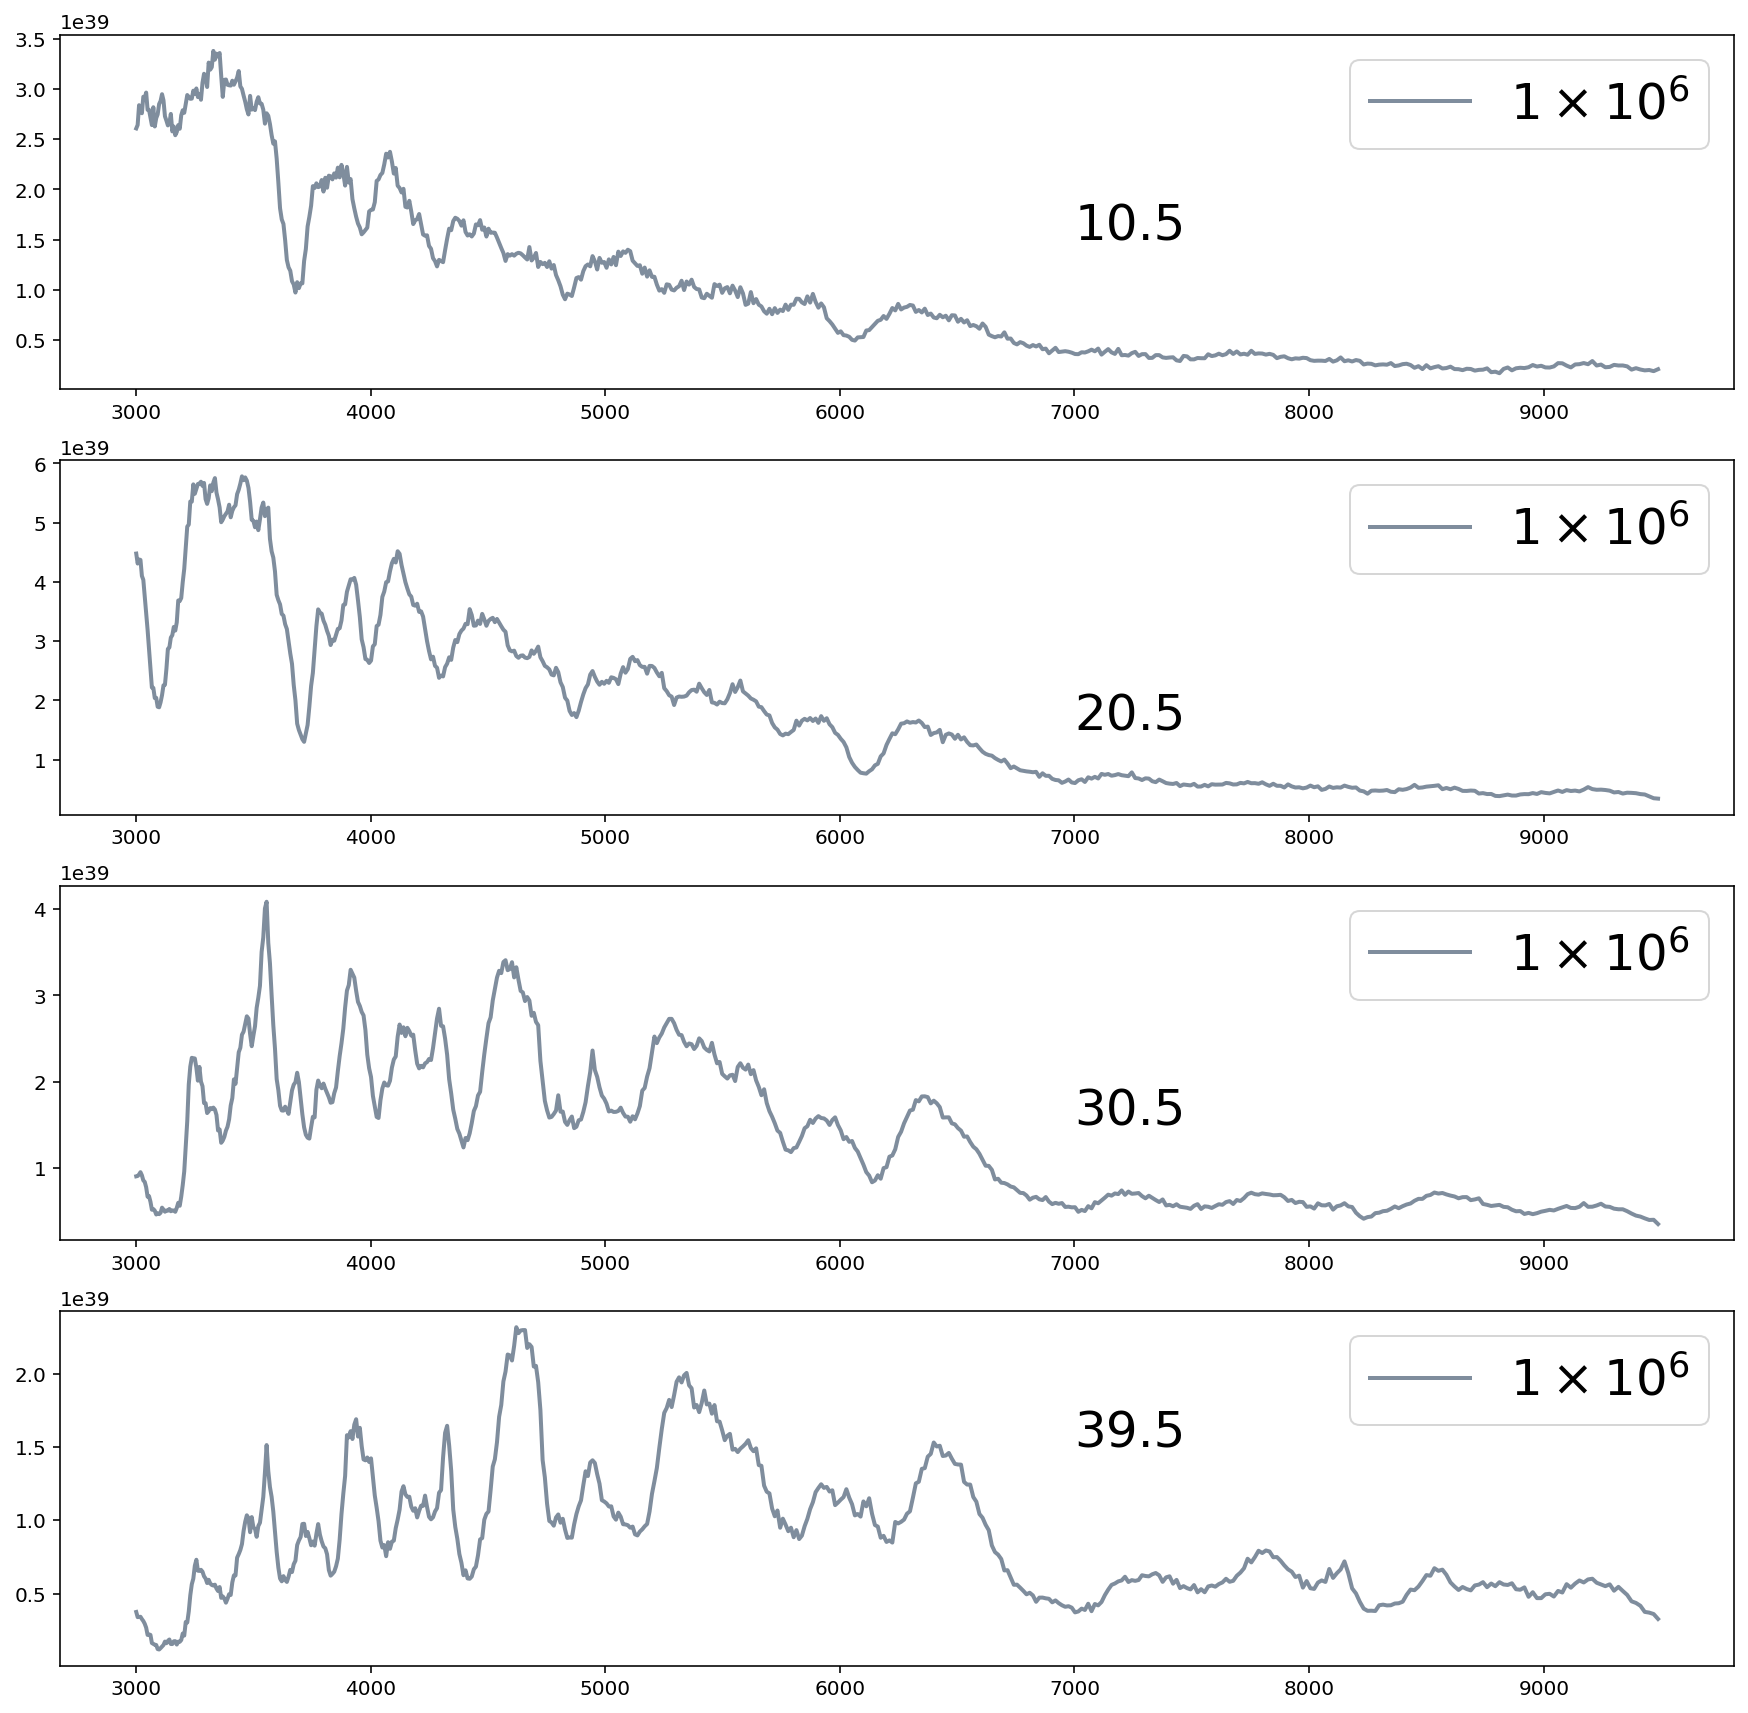

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

plot_sedona_spectrum(list_model1_spectra[4], axs[0], color='#001d3d', alpha=0.5, label=r'$1 \times 10^{6}$')
#plot_sedona_spectrum(list_model2_spectra[4], axs[0], color='#ee9b00', alpha=1.0, label=r'$5 \times 10^{6}$')

axs[0].text(7000, 1.5e39, list_model1_spectra[4].split('/')[-1].split('_')[-1][0:4], fontsize=25)

plot_sedona_spectrum(list_model1_spectra[14], axs[1], color='#001d3d', alpha=0.5, label=r'$1 \times 10^{6}$')
#plot_sedona_spectrum(list_model2_spectra[14], axs[1], color='#ee9b00', alpha=1.0, label=r'$5 \times 10^{6}$')

axs[1].text(7000, 1.5e39, list_model1_spectra[14].split('/')[-1].split('_')[-1][0:4], fontsize=25)

plot_sedona_spectrum(list_model1_spectra[24], axs[2], color='#001d3d', alpha=0.5, label=r'$1 \times 10^{6}$')
#plot_sedona_spectrum(list_model2_spectra[24], axs[2], color='#ee9b00', alpha=1.0, label=r'$5 \times 10^{6}$')

axs[2].text(7000, 1.5e39, list_model1_spectra[24].split('/')[-1].split('_')[-1][0:4], fontsize=25)

plot_sedona_spectrum(list_model1_spectra[-1], axs[3], color='#001d3d', alpha=0.5, label=r'$1 \times 10^{6}$')
#plot_sedona_spectrum(list_model2_spectra[-1], axs[3], color='#ee9b00', alpha=1.0, label=r'$5 \times 10^{6}$')

axs[3].text(7000, 1.5e39, list_model1_spectra[-1].split('/')[-1].split('_')[-1][0:4], fontsize=25)

In [13]:
columns = ['Time', 'Lbol', 'Mbol', 'U', 'B', 'V', 'Cousins_R', 'Cousins_I', 'UVW1', 'UVM2', 'UVW2']
sedona_lc1_df = pd.read_csv(model1_lc, names=columns, 
                             sep='\s+', engine='python', skiprows=2, comment='#')

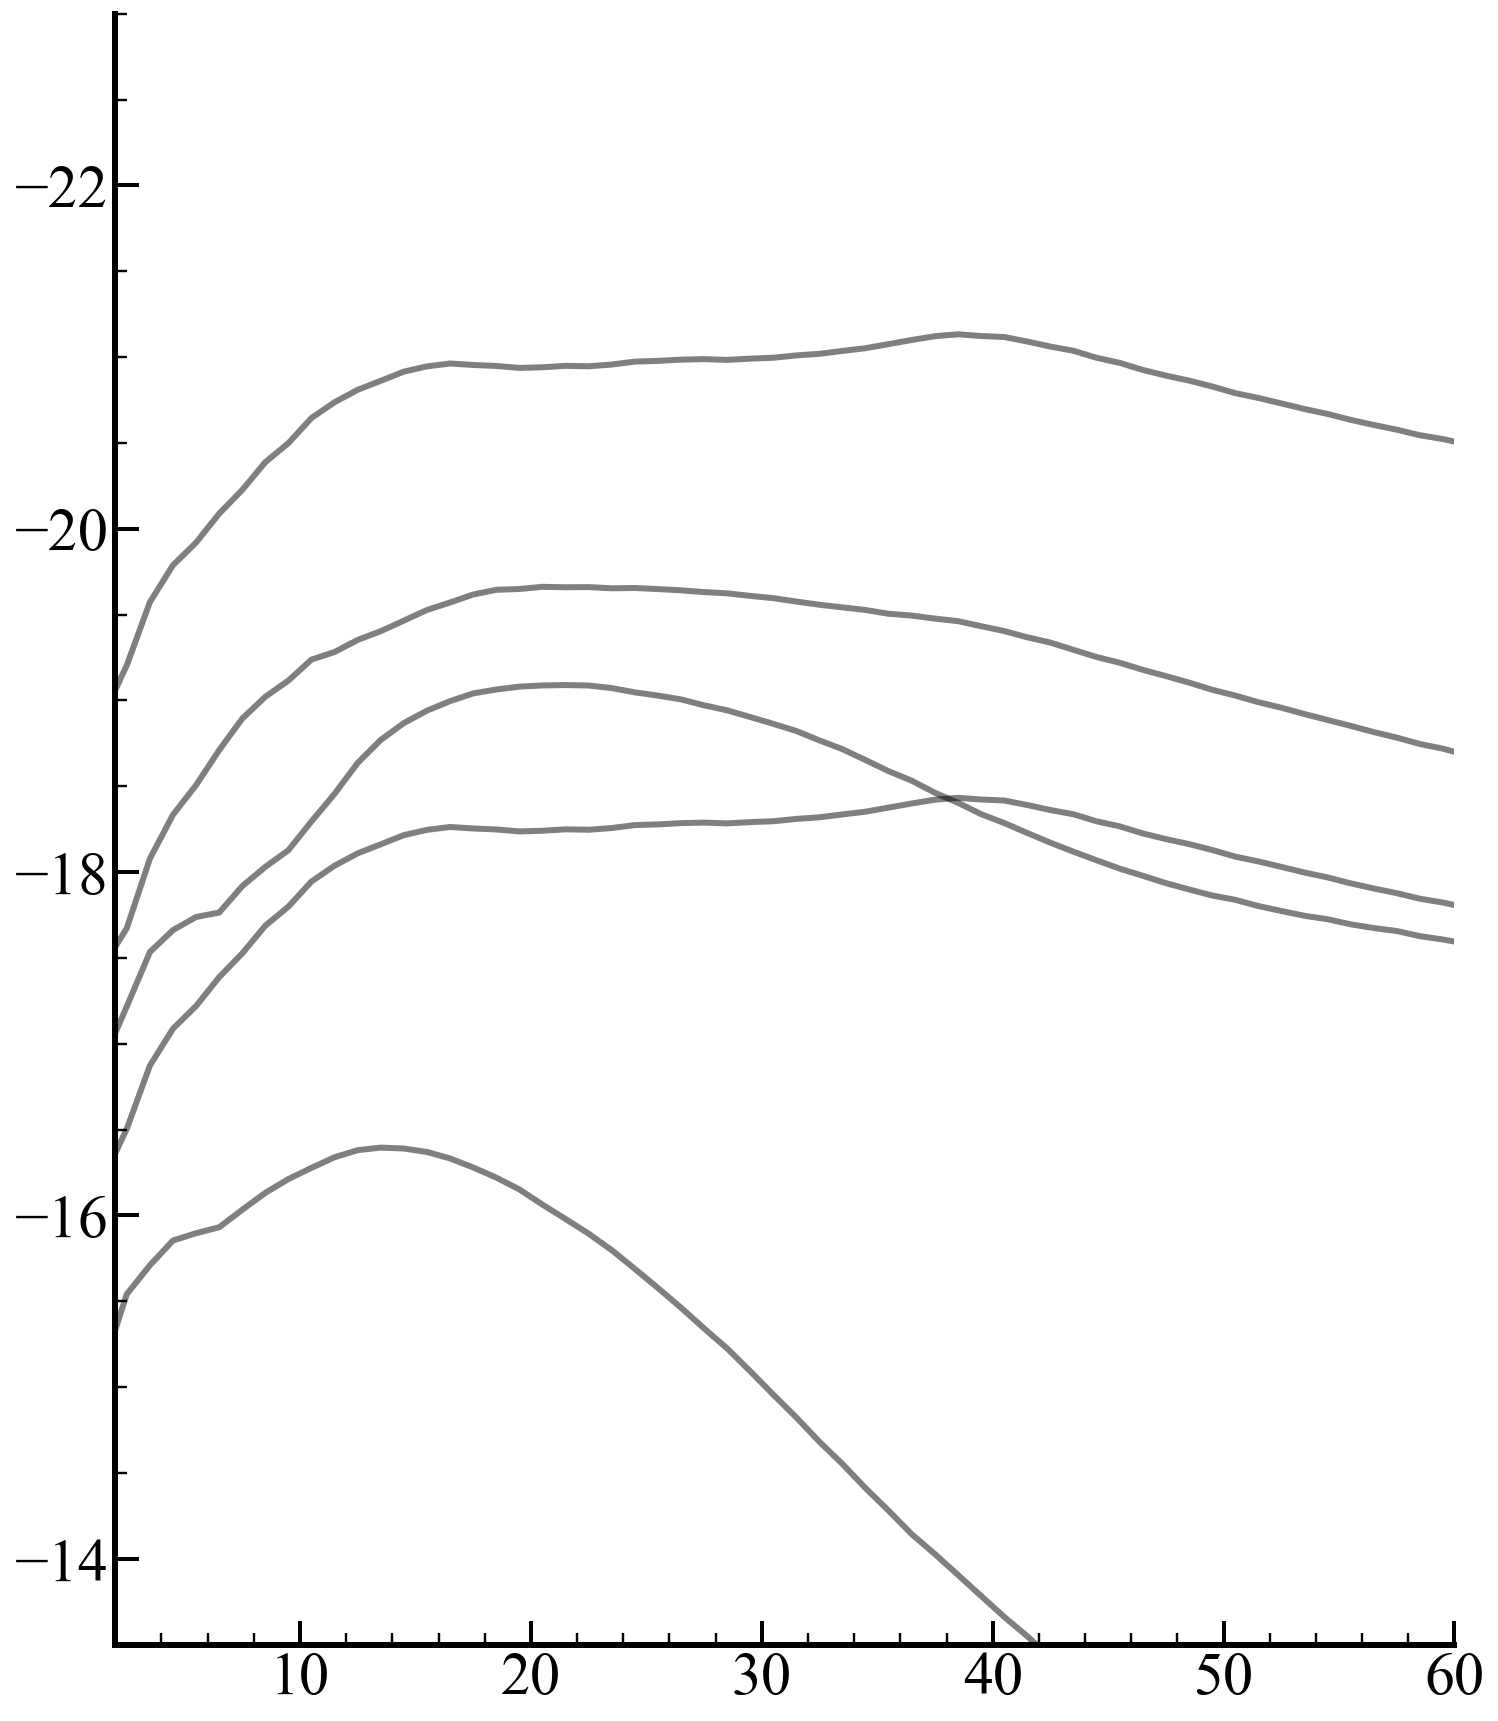

In [15]:
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111)



plot_params('A', ax, ml_x = 10, mil_x = 2, ml_y = 2, mil_y = 0.5, invert=True)
legend_properties = {'size':25, 'weight':'book'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 3

#-----------------------------------------------------------------------------------------------#
## UBVRI photometry dataframe
#ax.text(2, -22, '[A]', fontsize=25, fontweight='bold', color='black')    

# Model 1  (10^5 particles)

ax.plot(sedona_lc1_df['Time'], sedona_lc1_df['Cousins_I'], color='black', linewidth=3.0, ls='-', alpha=0.5, dash_capstyle='round')
ax.plot(sedona_lc1_df['Time'], sedona_lc1_df['Cousins_I']-2.7, color='black', linewidth=3.0, ls='-', alpha=0.5, dash_capstyle='round')
ax.plot(sedona_lc1_df['Time'], sedona_lc1_df['Cousins_R']-1.0, color='black', linewidth=3.0, ls='-', alpha=0.5, dash_capstyle='round')
ax.plot(sedona_lc1_df['Time'], sedona_lc1_df['U']+2.7, color='black', linewidth=3.0, ls='-', alpha=0.5, dash_capstyle='round')
ax.plot(sedona_lc1_df['Time'], sedona_lc1_df['V']+0.0, color='black', linewidth=3.0, ls='-', alpha=0.5, dash_capstyle='round')


for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 30)
    #tick.label1.set_fontweight('bold')
    
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 30)
    #tick.label1.set_fontweight('bold')
ax.set_xlim(2, 60)    
ax.set_ylim(-13.5, -23)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax[0].legend(frameon= False, fancybox = False, shadow = False, facecolor = 'white', 
#        prop = legend_properties, framealpha=0.3,
#                    bbox_to_anchor = (0.25, 0.25))

(1.0, 60.0)

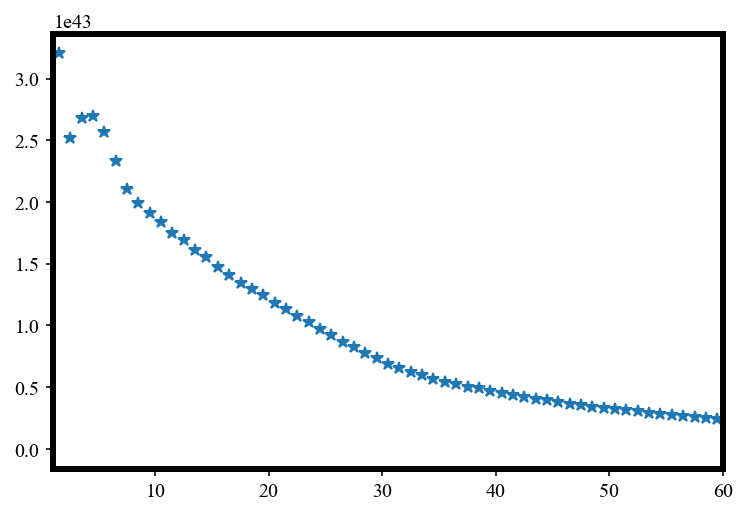

In [12]:
plt.plot(sedona_lc1_df['Time'], sedona_lc1_df['Lbol'], '*')
plt.xlim(1, 60)